In [1]:
%load_ext watermark
%watermark

2020-09-08T12:11:43-05:00

CPython 3.7.6
IPython 7.13.0

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
vehiculos = pd.read_pickle("vehiculos.3.variables_agrupadas.pkl")
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [4]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo          object
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

In [5]:
from ipywidgets import interact,fixed

## Recuento por multiples grupos
Consiste en comparar variables categoricas y construiremos una pivot table. (parecida a una tabla de doble entrada)

In [6]:
def pivot_recuento(df,filas,columnas,calc_field):
    df_pivot = df.pivot_table(values=calc_field,
                             index = filas,
                             columns = columnas,
                             aggfunc = np.size
                             ).dropna(axis=0,how="all")
    return df_pivot

In [7]:
consumo_combustible = pivot_recuento(vehiculos,"combustible_tipo","consumo_tipo","year")
consumo_combustible.fillna(0)

consumo_tipo,muy bajo,bajo,medio,alto,muy alto
combustible_tipo,,,,,
Hibrido,61.0,6.0,1.0,2.0,0.0
Normal,5686.0,4931.0,5736.0,3158.0,4567.0
Premium,1386.0,2211.0,3836.0,1146.0,1627.0
otros tipos de combustible,521.0,340.0,508.0,482.0,586.0


In [8]:
import seaborn as sns
def mapa_calor(df,col1,col2):
    pivot_table = pivot_recuento(df,col1,col2,"year")
    sns.heatmap(pivot_table,annot=True,fmt="g")

In [11]:
interact(mapa_calor,df=fixed(vehiculos),col1=vehiculos.columns,
         col2=vehiculos.columns)

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

<function __main__.mapa_calor(df, col1, col2)>

In [12]:
def medias_por_categoria(col_grupo, col_calculo):
    vehiculos.groupby(col_grupo)[col_calculo].mean().plot.barh()
    plt.ylabel(col_grupo)
    plt.xlabel("valores medios de {}".format(col_calculo))
    plt.show()

In [16]:
columnas_numericas = vehiculos.select_dtypes(["int","float"]).columns
columnas_categoricas = vehiculos.select_dtypes(["object","category"]).columns
columnas_tipo = [col for col in vehiculos.columns if col.endswith("_tipo")]

In [17]:
interact(medias_por_categoria,col_grupo=columnas_categoricas,col_calculo=columnas_numericas)

interactive(children=(Dropdown(description='col_grupo', options=('fabricante', 'modelo', 'transmision', 'tracc…

<function __main__.medias_por_categoria(col_grupo, col_calculo)>

## medias por multiples tipos

In [18]:
def pivot_media(filas,columnas,calc_field):
    df_pivot = vehiculos.pivot_table(values = calc_field,
                                     index=filas,
                                     columns=columnas,
                                     aggfunc=np.mean
                                    ).dropna(axis=0, how="all")
    return df_pivot

In [19]:
pivot_media("combustible_tipo","consumo_tipo","co2")

consumo_tipo,muy bajo,bajo,medio,alto,muy alto
combustible_tipo,,,,,
Hibrido,144.213115,274.166667,169.000000,463.000000,NaN
Normal,329.216213,406.988299,469.701748,538.449897,659.006325
Premium,337.768474,409.595587,469.455411,540.596570,676.389701
otros tipos de combustible,338.857657,426.649875,493.097404,572.344314,634.370636


In [20]:
def heatmap_medias_tipos(col1,col2,col3):
    pivot_table = pivot_media(col1,col2,col3)
    sns.heatmap(pivot_table,annot=True,fmt="g")

In [21]:
interact(heatmap_medias_tipos,col1=vehiculos.columns,col2=vehiculos.columns,col3=columnas_numericas)

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

<function __main__.heatmap_medias_tipos(col1, col2, col3)>

## Comparacion de tendencias temporales
algunos datasets tienen medidas temporales. mediante estas podemos observar la evolución de una variable en terminos de tiempo, para esto los gráficos de linea son los más adecuados

In [29]:
vehiculos_pre_2017 = vehiculos.query("year<2017")

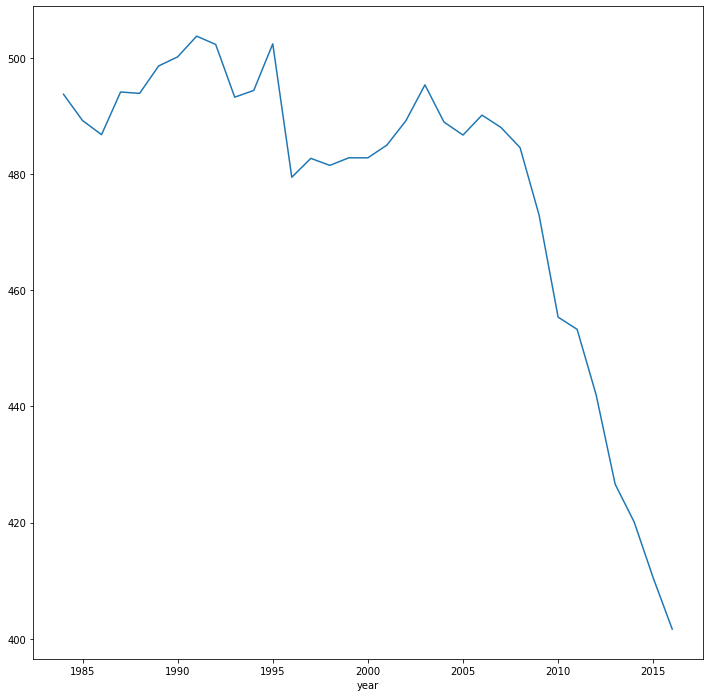

In [30]:
vehiculos_pre_2017.groupby("year").co2.mean().plot()

In [35]:
def evolucion_medias(col_calculo,col_temporal):
    vehiculos_pre_2017.groupby(col_temporal)[col_calculo].mean().plot()
    plt.show()

In [36]:
interact(evolucion_medias,col_calculo=vehiculos_pre_2017.select_dtypes(["int","float"]),
       col_temporal="year")

interactive(children=(Dropdown(description='col_calculo', options=('year', 'desplazamiento', 'cilindros', 'con…

<function __main__.evolucion_medias(col_calculo, col_temporal)>

In [40]:
def evolucion_conteo(col_conteo):
    for categoria in vehiculos_pre_2017[col_conteo].unique():
        num_vehiculos_categoria = vehiculos_pre_2017[vehiculos_pre_2017[col_conteo] == categoria].groupby(
            "year").apply(np.size)
        plt.plot(
            num_vehiculos_categoria.index,
            num_vehiculos_categoria,
            label=categoria
        )
        plt.legend()

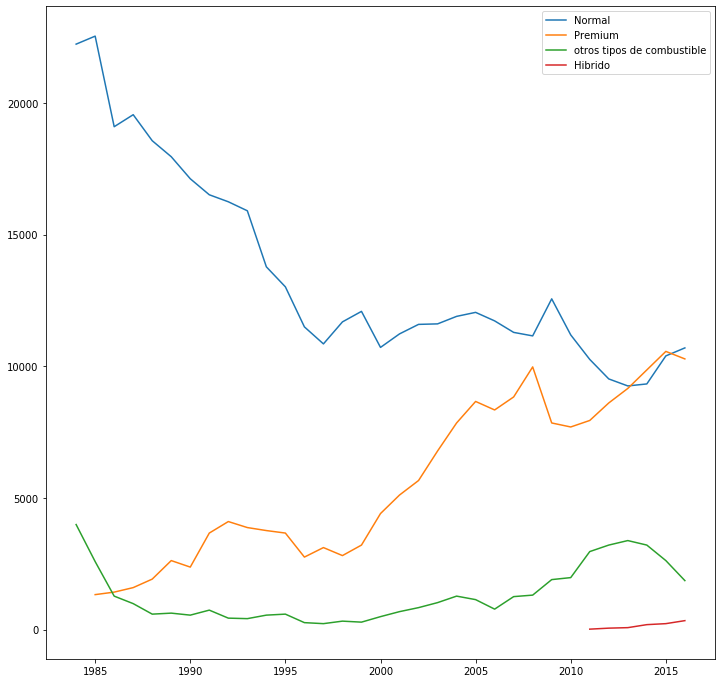

In [44]:
evolucion_conteo("combustible_tipo")

In [43]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehiculos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehiculos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehiculos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


Finalmente se deben sacar conclusiones para que pueda leerlo cualquier persona